3.623601559018872
-2.594272075030747


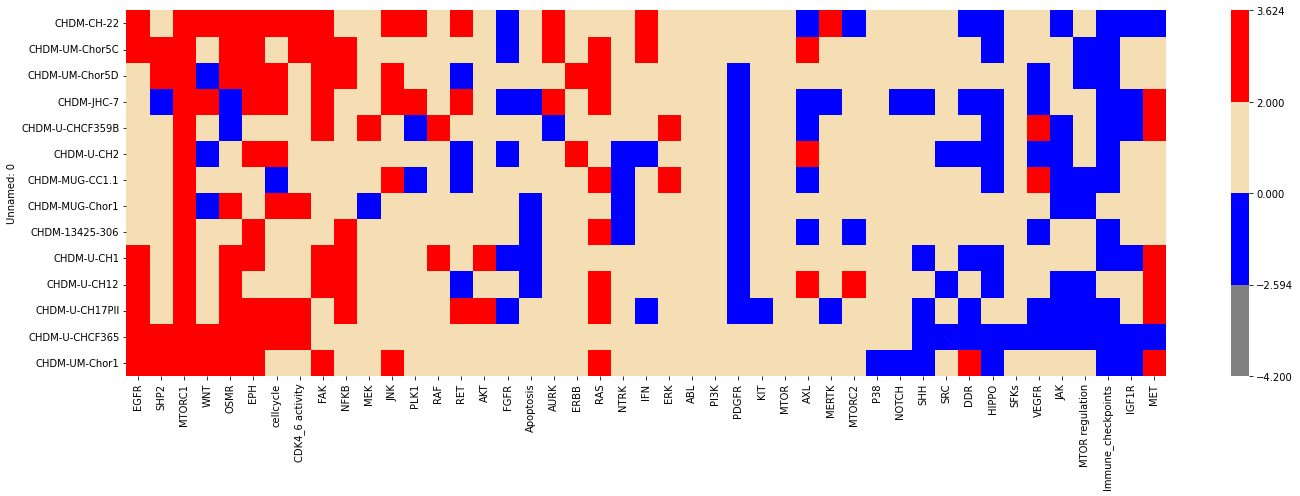

In [42]:

# heatmap plot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
from pathlib import Path


basket_scores_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.08.01_CJ_paper_pdx_chordomacl/basket_scores_4th_gen_zscored.tsv'
sub_basket_scores_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.08.01_CJ_paper_pdx_chordomacl/subbasket_scores_EGFR.tsv'
instructions = pd.read_excel('/home/amir/Desktop/Annika_files/Heatmap_TUPAC scores_Cell lines.xlsx')
instructions.set_index('Unnamed: 0',inplace=True)
basket_names = instructions.columns
patients_list = instructions.index
basekt_scores_df = pd.read_csv(basket_scores_path,sep='\t')
basekt_scores_df = basekt_scores_df[basekt_scores_df.Sample.isin(patients_list)]
basket_names = [x for x in basket_names if x in basekt_scores_df.columns]
basekt_scores_df.set_index('Sample',inplace=True)
basekt_scores_df = basekt_scores_df[basket_names]
df = basekt_scores_df.copy()
min_df = df.min().min()
max_df = df.max().max()
print(max_df)
print(min_df)
df = df.fillna(-4.2)
df = df.loc[patients_list,:]
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True

cmap = colors.ListedColormap(['grey','blue','wheat','red'])
bounds = [-4.2,min_df,0,2,max_df]
norm = colors.BoundaryNorm(bounds,cmap.N)

# plot heatmap
sns.heatmap(df,cmap=cmap,norm=norm)

plt.savefig('/home/amir/Desktop/Annika_files/figure4.svg')
plt.show()